In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [2]:
#path_to_file = './datasets/GlobalDataset2017.csv'
Orig_Global = pd.read_csv("./datasets/GlobalDataset2017.csv")
Global = pd.read_csv("./datasets/GlobalDataset2017.csv")

In [3]:
#Global1.loc[Global1['citizenship'] == "TH"]
#Global = Global1[Global1["citizenship"].str.match('TH')]

In [4]:
obj_df = Global.select_dtypes(include=['object']).copy()
obj_df.head()

,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,Case Management,Female,18--20,Adult,Adult,Adult,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,MD,Unknown,MD
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ


In [5]:
cleanup_nums = {"gender":     {"Female": 0, "Male": 1, "Unknown": 2},
                "majorityStatus": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "majorityStatusAtExploit": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "majorityEntry": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "Datasource": {"Case Management": 0, "Hotline": 1},
                "RecruiterRelationship":{
                    "Unknown": 3,
                    "-99": 3,
                    "Other": 3,
                    "Friend": 2,
                    "Family/Relative": 0,
                    "Intimate Partner": 1,
                    "Family/Relative; Intimate Partner": 0,
                    "Friend; Other": 2,
                    "Friend; Intimate Partner": 1,
                    "Family/Relative; Friend": 0,
                    "Family/Relative; Unknown": 0,
                    "Intimate Partner; Other": 1,
                    "Family/Relative; Other": 0,
                    "Family/Relative; Friend; Other": 0,
                    "Friend; Intimate Partner; Other": 1,
                    "Intimate Partner; Unknown": 1,
                    "Friend; Unknown": 2
                }
               }

In [6]:
cleanup_citizen = {"citizenship": {"PH": 1,
"ZZ": 0,
"MD": 2,
"UA": 2,
"US": 0,
"ID": 1,
"BY": 2,
"MM": 1,
"KH": 1,
"RO": 2,
"GH": 0,
"KG": 1,
"BG": 2,
"HT": 0,
"UZ": 1,
"AF": 1,
"-99": 6,
"MX": 0,
"GW": 0,
"TH": 1,
"LA": 1,
"CO": 0,
"NG": 0,
"CN": 1,
"LK": 1,
"TJ": 1,
"UG": 0,
"SN": 0,
"KZ": 1,
"SL": 0,
"CD": 0,
"AL": 2,
"ML": 0,
"BF": 0,
"NE": 0,
"CI": 0,
"NP": 1,
"TM": 1,
"BO": 1,
"VN": 1,
"GN": 0,
"ER": 0,
"KR": 1,
"BD": 1,}         
                }

In [7]:
cleanup_exploit =  {"CountryOfExploitation": {"-99": 6,
"US": 5,
"MD": 2,
"UA": 2,
"RU": 2,
"PH": 1,
"ID": 1,
"MY": 1,
"GH": 0,
"AE": 1,
"TH": 1,
"BY": 2,
"SN": 0,
"BG": 2,
"PL": 2,
"HT": 0,
"RO": 2,
"TR": 1,
"SA": 1,
"KZ": 1,
"QA": 1,
"Y1": 1,
"KW": 1,
"MK": 2,
"UZ": 1,
"BA": 2,
"UG": 0,
"JP": 1,
"JO": 1,
"ZZ": 0,
"OM": 1,
"TJ": 1,
"TT": 0,
"AF": 1,
"LB": 1,
"SL": 0,
"KH": 1,
"CZ": 2,
"CN": 1,
"AL": 2,
"SY": 1,
"SG": 1,
"ZA": 0,
"TW": 1,
"IT": 2,
"TM": 1,
"AT": 2,
"BH": 1,
"MU": 0,
"AR": 0,
"DK": 2,
"EG": 0,
"EC": 0,
"CY": 1}
               }

In [8]:
obj_df.replace(cleanup_nums, inplace=True)

In [9]:
obj_df.replace(cleanup_citizen, inplace=True)

In [10]:
obj_df.replace(cleanup_exploit, inplace=True)

In [11]:
obj_df.drop('ageBroad', axis=1, inplace=True)
obj_df.dtypes


Datasource                 int64
gender                     int64
majorityStatus             int64
majorityStatusAtExploit    int64
majorityEntry              int64
citizenship                int64
RecruiterRelationship      int64
CountryOfExploitation      int64
dtype: object

In [12]:
#BEFORE REPLACING: Check the columns and their values...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']].head()


,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,Case Management,Female,Adult,Adult,Adult,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,MD,Unknown,MD
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ


In [13]:
#REPLACE...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']]=obj_df[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']]

#AFTER REPLACING: Check the columns and their values...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']].head()


,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,0,0,0,0,0,1,3,1
NaN,0,0,0,3,3,1,3,1
NaN,0,0,0,3,3,2,3,2
NaN,0,0,0,3,3,1,3,1
NaN,0,0,0,3,3,1,3,1


In [14]:
Global.drop('ageBroad', axis=1, inplace=True)
Global.drop('yearOfRegistration', axis=1, inplace=True)
Global.drop('meansOfControlNotSpecified', axis=1, inplace=True)

In [15]:
Global.replace(to_replace=-99, value=0, inplace=True, axis=0)

C:\Users\prapa\Anaconda2\lib\site-packages\pandas\core\generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


In [16]:
(Global == -99).sum()

Datasource                                0
gender                                    0
majorityStatus                            0
majorityStatusAtExploit                   0
majorityEntry                             0
citizenship                               0
meansOfControlDebtBondage                 0
meansOfControlTakesEarnings               0
meansOfControlRestrictsFinancialAccess    0
meansOfControlThreats                     0
meansOfControlPsychologicalAbuse          0
meansOfControlPhysicalAbuse               0
meansOfControlSexualAbuse                 0
meansOfControlFalsePromises               0
meansOfControlPsychoactiveSubstances      0
meansOfControlRestrictsMovement           0
meansOfControlRestrictsMedicalCare        0
meansOfControlExcessiveWorkingHours       0
meansOfControlUsesChildren                0
meansOfControlThreatOfLawEnforcement      0
meansOfControlWithholdsNecessities        0
meansOfControlWithholdsDocuments          0
meansOfControlOther             

In [17]:
Global.dtypes

Datasource                                int64
gender                                    int64
majorityStatus                            int64
majorityStatusAtExploit                   int64
majorityEntry                             int64
citizenship                               int64
meansOfControlDebtBondage                 int64
meansOfControlTakesEarnings               int64
meansOfControlRestrictsFinancialAccess    int64
meansOfControlThreats                     int64
meansOfControlPsychologicalAbuse          int64
meansOfControlPhysicalAbuse               int64
meansOfControlSexualAbuse                 int64
meansOfControlFalsePromises               int64
meansOfControlPsychoactiveSubstances      int64
meansOfControlRestrictsMovement           int64
meansOfControlRestrictsMedicalCare        int64
meansOfControlExcessiveWorkingHours       int64
meansOfControlUsesChildren                int64
meansOfControlThreatOfLawEnforcement      int64
meansOfControlWithholdsNecessities      

In [18]:
X = Global

In [19]:
km3 = KMeans(n_clusters=3)

#Fit model on data
km3.fit(X)

#Get the labels

labels = km3.labels_

labels

array([2, 2, 2, ..., 0, 0, 0])

In [20]:
km3.predict(Global)

array([2, 2, 2, ..., 0, 0, 0])

In [21]:
pd.value_counts(labels)

2    24696
1    12939
0     9467
dtype: int64

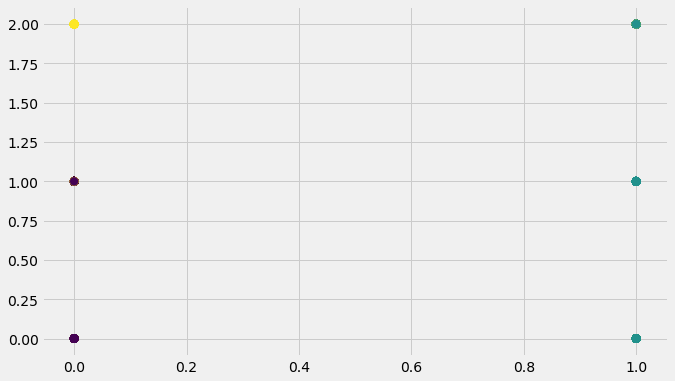

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=68, c=labels);

In [23]:
from sklearn.decomposition import TruncatedSVD

In [24]:
trun = TruncatedSVD(n_components=2)

Xt = trun.fit_transform(X.values)

In [25]:
Xt

array([[ 2.32021507, -0.56825783],
       [ 4.71526289, -2.53855971],
       [ 5.54644028, -2.09467134],
       ..., 
       [ 8.36832664,  1.44694182],
       [ 8.33442099,  1.5071466 ],
       [ 8.41012684,  1.47298302]])

In [26]:
#Centriod values
centriods = km3.cluster_centers_


In [27]:
km3 = KMeans(n_clusters=3)

#Fit model on data
km3.fit(Xt)

#Get the labels

labels = km3.labels_

labels

array([0, 0, 0, ..., 2, 2, 2])

In [28]:
pd.value_counts(labels)

0    24696
1    11488
2    10918
dtype: int64

In [29]:
#Centriod values
centriods = km3.cluster_centers_


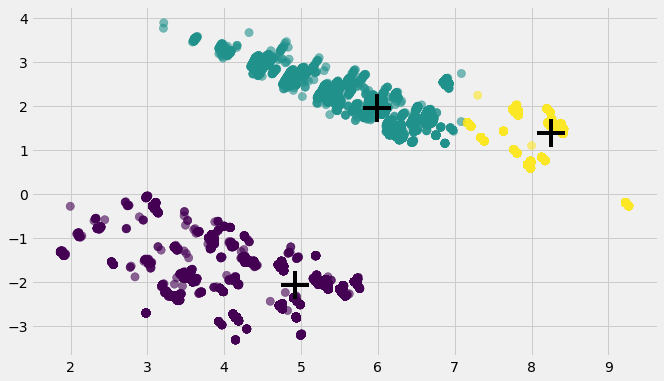

In [30]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels, alpha= .6)
plt.scatter(centriods[ : , 0], centriods[ : , 1], s = 800, marker="+", c = "black")
plt.show()

In [31]:
#Intialize the KMeans algorithm with 4 clusters

km4 = KMeans(n_clusters=4)

#Fit model on data
km4.fit(Xt)

#Get the labels

labels = km4.labels_

labels

array([0, 2, 2, ..., 1, 1, 1])

In [32]:
#The counts of labels
pd.value_counts(labels)

2    17548
3    11488
1    10918
0     7148
dtype: int64

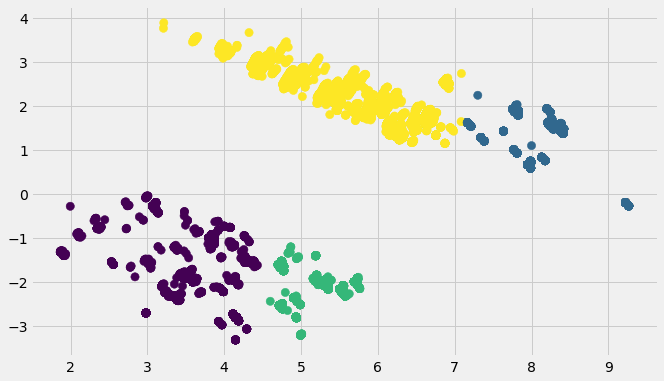

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels);

In [34]:
#Centriod values
cents4 = km4.cluster_centers_

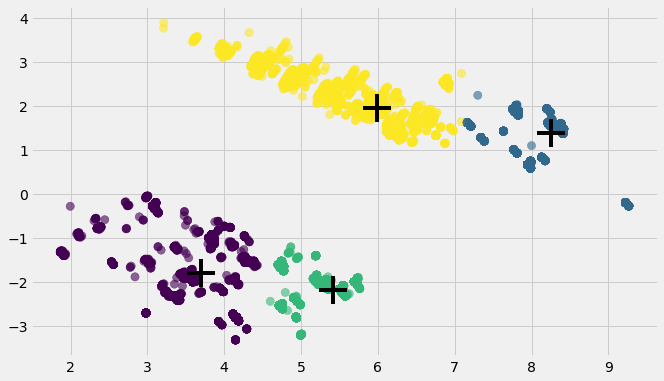

In [35]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels, alpha= .6)
plt.scatter(cents4[ : , 0], cents4[ : , 1], s = 800, marker="+", c = "black")
plt.show()

In [36]:
#silhouette_score(Xt, labels)

In [37]:
#km3.inertia_

In [38]:
#km4.inertia_

#Intialize range of cluster values from 2 to 16
#cluster_range = range(2, 17)

#Intialize list to store silhouette scores

#s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xt)
    labels = model.labels_
    score = silhouette_score(Xt, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");


cluster_range = range(2, 17)
#Intialize list to store inertia scores

i_scores = []

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xt)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

In [39]:
data = X.copy()

data["labels"] = labels

In [40]:
data.shape

(47102, 56)

In [41]:
data.groupby("labels").mean()

,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,...,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
labels,,,,,,,,,,,,,,,,,,,,,
0,0.013151,0.567851,0.378567,2.599189,0.767068,1.035395,0.083660,0.197118,0.000000,0.155288,...,0.0,0.000000,0.000000,2.818411,1.041410,0.000140,0.011752,0.056519,0.247202,0.684387
1,0.000000,0.273860,2.476552,3.000000,2.944129,1.215332,0.002381,0.000000,0.000000,0.000824,...,0.0,0.000000,0.000000,2.953288,6.000000,0.000092,0.046529,0.000000,0.106705,0.846675
2,0.000000,0.309380,0.576419,2.993390,2.997835,1.784933,0.000114,0.000171,0.000000,0.001425,...,0.0,0.000000,0.000000,2.974185,1.742079,0.000000,0.025815,0.000000,0.024447,0.949738
3,0.932974,0.089572,0.631616,1.588353,1.918872,0.092444,0.032904,0.072859,0.010446,0.137709,...,0.0,0.000958,0.005571,2.537866,5.067026,0.098886,0.030554,0.080519,0.023068,0.740164


In [42]:
#data.groupby("labels").mean().iloc[0].plot(kind="bar", figsize = (14, 7))

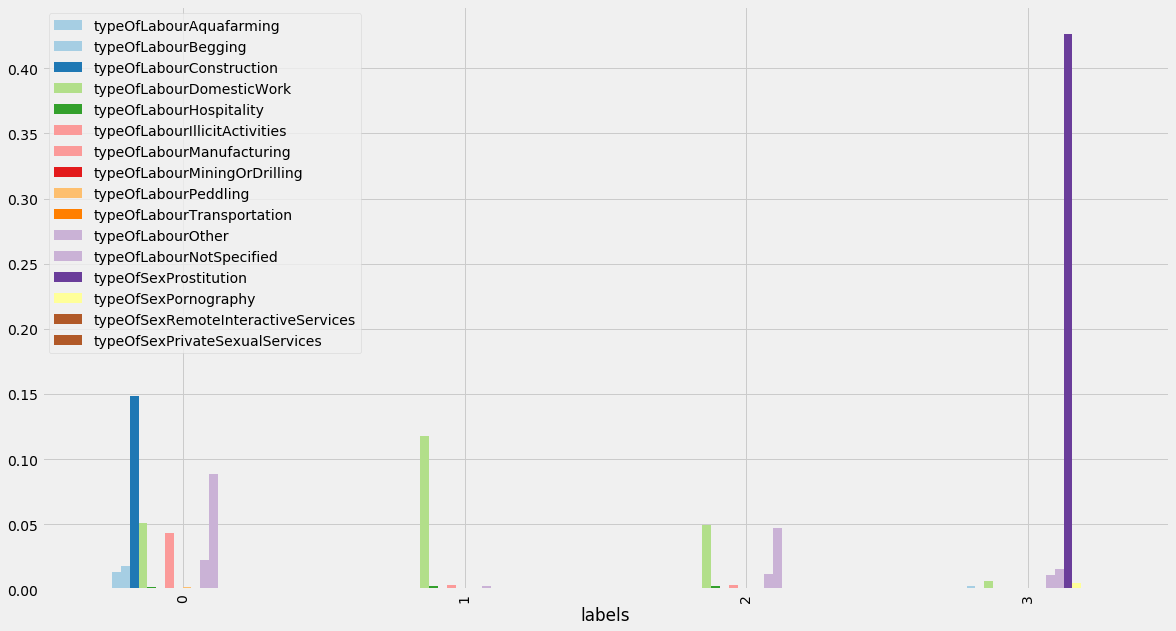

In [43]:
data.groupby("labels").mean().iloc[:,31:47].plot(kind="bar",colormap='Paired',figsize = (18, 10))

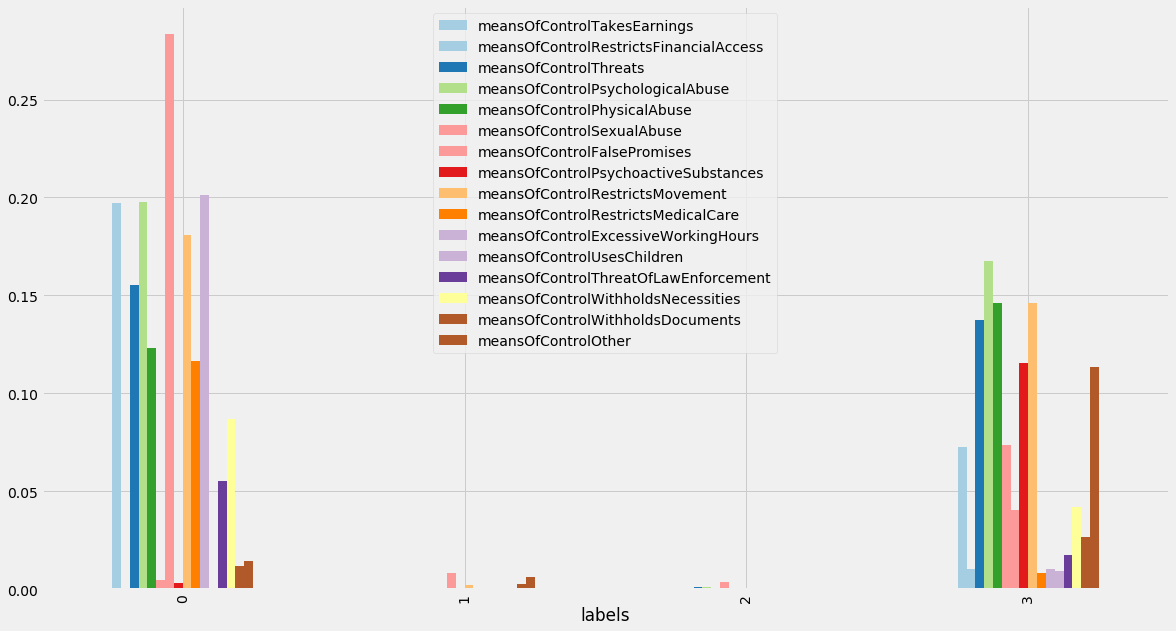

In [44]:
col_list=range(7,23) # Set the list of columns to plot for each cluster label
data.groupby("labels").mean().iloc[:,col_list].plot(kind="bar",colormap='Paired', figsize = (18, 10))

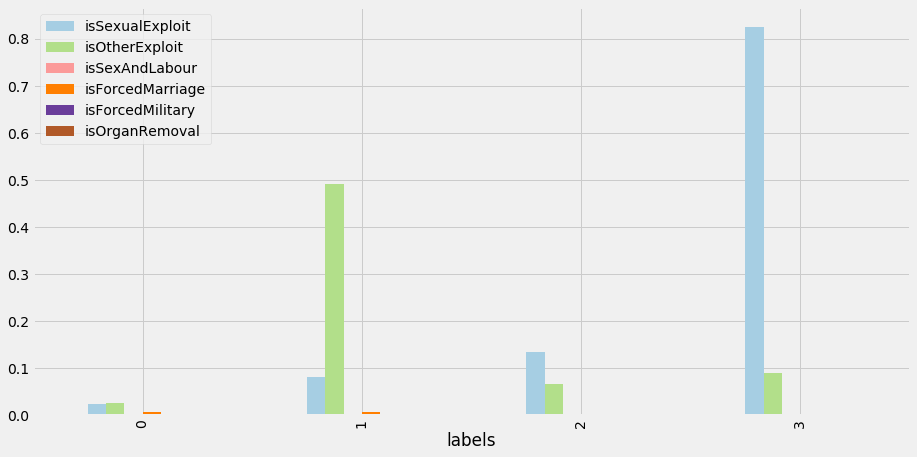

In [45]:
data.groupby("labels").mean().iloc[:,24:30].plot(kind="bar", colormap='Paired', figsize = (14, 7))

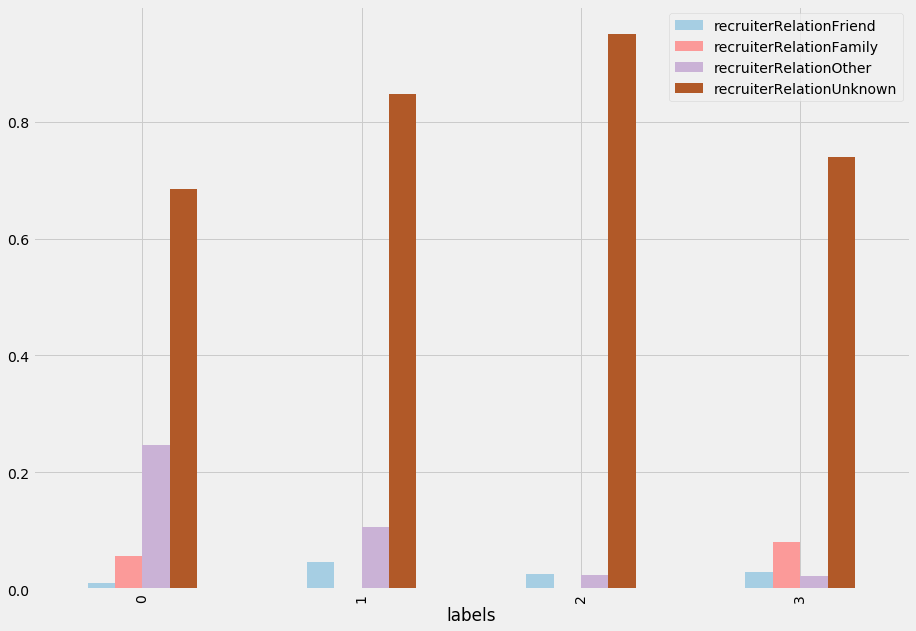

In [46]:
data.groupby("labels").mean().iloc[:,51:55].plot(kind="bar", colormap='Paired',figsize = (14, 10))

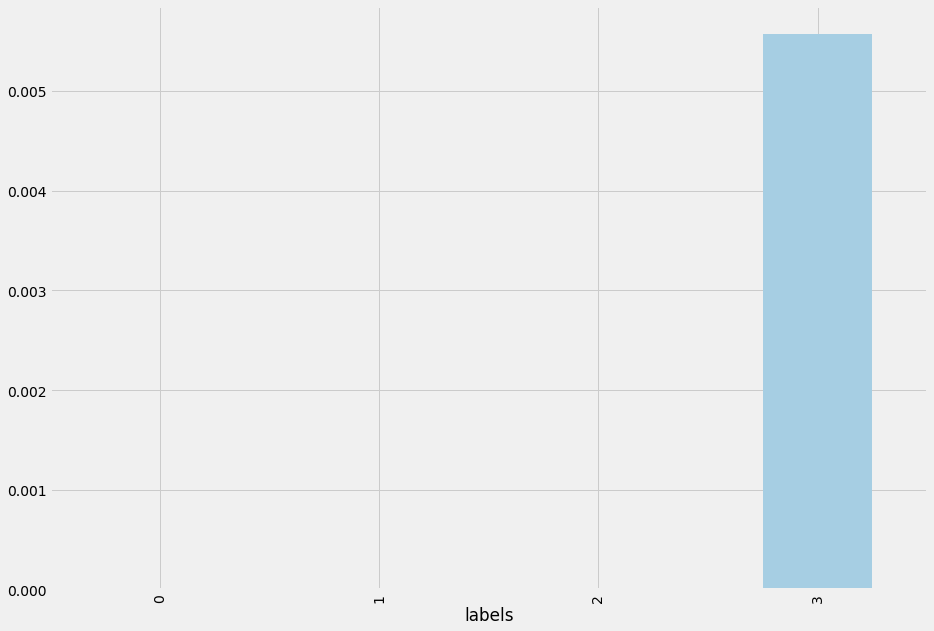

In [47]:
data.groupby("labels").mean().iloc[:,47].plot(kind="bar", colormap='Paired',figsize = (14, 10))

In [48]:
data.groupby("labels").mean().T

labels,0,1,2,3
Datasource,0.013151,0.000000,0.000000,0.932974
gender,0.567851,0.273860,0.309380,0.089572
majorityStatus,0.378567,2.476552,0.576419,0.631616
majorityStatusAtExploit,2.599189,3.000000,2.993390,1.588353
majorityEntry,0.767068,2.944129,2.997835,1.918872
citizenship,1.035395,1.215332,1.784933,0.092444
meansOfControlDebtBondage,0.083660,0.002381,0.000114,0.032904
meansOfControlTakesEarnings,0.197118,0.000000,0.000171,0.072859
meansOfControlRestrictsFinancialAccess,0.000000,0.000000,0.000000,0.010446
meansOfControlThreats,0.155288,0.000824,0.001425,0.137709


In [49]:
df_labels = pd.DataFrame()
df_labels['labels'] = labels
df_labels.head()

,labels
0,0
1,2
2,2
3,2
4,2


In [50]:
Orig_Global['labels'] = labels

In [51]:
Orig_Global.reset_index()

,index,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,labels
0,NaN,2010,Case Management,Female,18--20,Adult,Adult,Adult,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,0
1,NaN,2011,Case Management,Female,18--20,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
2,NaN,2004,Case Management,Female,18--20,Adult,-99,-99,MD,-99,...,-99,0,Unknown,MD,0,0,0,0,1,2
3,NaN,2011,Case Management,Female,18--20,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
4,NaN,2011,Case Management,Female,18--20,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
5,NaN,2011,Case Management,Female,21--23,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
6,NaN,2010,Case Management,Female,18--20,Adult,Adult,Adult,KZ,1,...,-99,-99,Unknown,KZ,0,0,0,0,1,0
7,NaN,2002,Case Management,Female,24--26,Adult,-99,-99,MD,-99,...,-99,0,Unknown,Y1,0,0,0,0,1,2
8,NaN,2002,Case Management,Female,24--26,Adult,-99,-99,MD,-99,...,-99,0,Unknown,Y1,0,0,0,0,1,2
9,NaN,2002,Case Management,Female,24--26,Adult,-99,-99,MD,-99,...,-99,0,Unknown,Y1,0,0,0,0,1,2


In [52]:
#Using .groupby, create a grouped dataframe where Global dataset is grouped by "Pclass".
Group = Orig_Global .groupby(labels)

In [53]:
type(Group)

pandas.core.groupby.DataFrameGroupBy

In [54]:
class_counts =Orig_Global.groupby('labels').size()

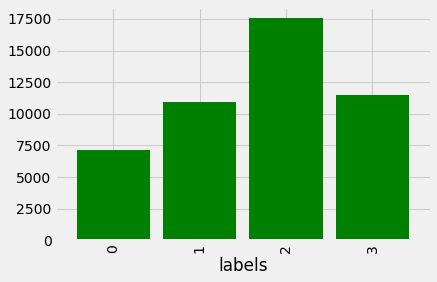

In [55]:
class_counts.plot(kind="bar", color="g", width=0.85)

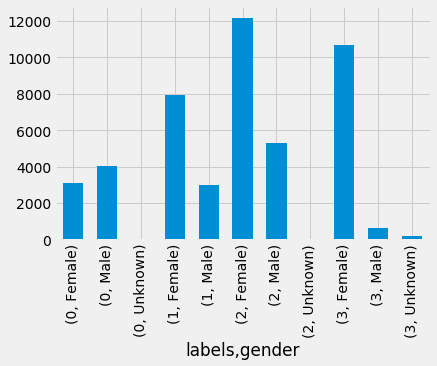

In [56]:
Orig_Global.groupby(['labels','gender'])['gender'].count().plot(kind='bar',stacked = True, width=0.6)

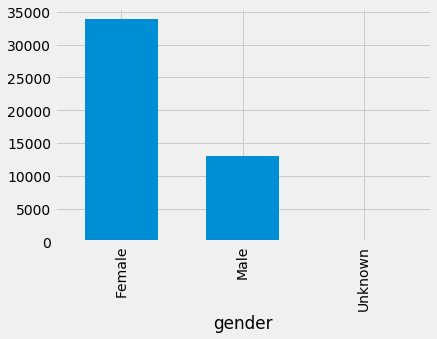

In [57]:
Orig_Global.groupby(['gender'])['gender'].count().plot(kind='bar',stacked = True, width=0.6)

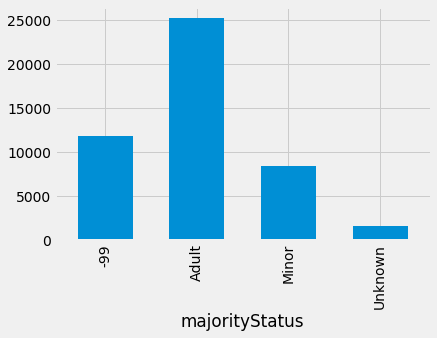

In [58]:
Orig_Global.groupby(['majorityStatus'])['majorityStatus'].count().plot(kind='bar',stacked = True, width=0.6)

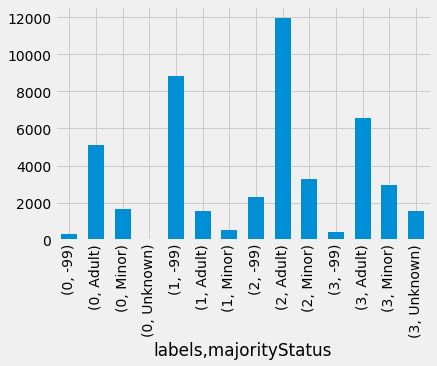

In [59]:
Orig_Global.groupby(['labels','majorityStatus'])['majorityStatus'].count().plot(kind='bar',stacked = True, width=0.6)

In [60]:
Cgender = Orig_Global.groupby(['labels','gender'])['gender'].count()
Cgender.unstack()

gender,Female,Male,Unknown
labels,,,
0,3101.0,4035.0,12.0
1,7928.0,2990.0,NaN
2,12177.0,5313.0,58.0
3,10644.0,659.0,185.0


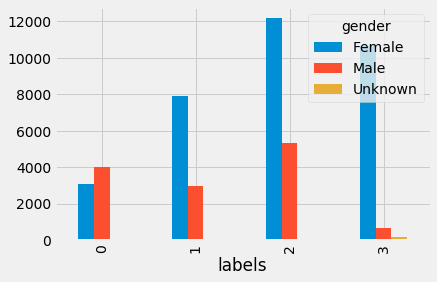

In [61]:
Cgender.unstack().plot(kind='bar')

In [83]:
Cage = Orig_Global.groupby(['labels','ageBroad'])['ageBroad'].count()

Cage
#Cage.unstack()

labels  ageBroad
0       -99          317
        0--8         287
        18--20       213
        21--23       386
        24--26       598
        27--29       593
        30--38      2125
        39--47       850
        48+          323
        9--17       1362
        Unknown       94
1       -99         8831
        0--8         104
        18--20       346
        21--23       407
        24--26       267
        27--29       165
        30--38       221
        39--47        82
        48+           53
        9--17        442
2       -99         2276
        0--8        1237
        18--20      1929
        21--23      2002
        24--26      1577
        27--29      1191
        30--38      3024
        39--47      1350
        48+          912
        9--17       2050
3       -99          395
        0--8          11
        18--20      1048
        21--23       709
        24--26       506
        27--29       261
        30--38       642
        39--47       152
        

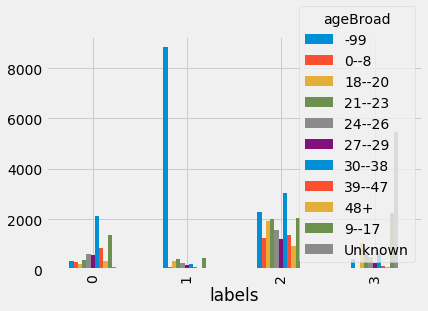

In [78]:
Cage.unstack().plot(kind='bar')

In [64]:
Orig_Global.groupby(['labels','citizenship'])['citizenship'].count()

labels  citizenship
0       AF               98
        BF               33
        BO               18
        BY              263
        CD               53
        CI               31
        CO               13
        ER               13
        GH              545
        GN               15
        GW              145
        HT              339
        ID             1322
        KG              282
        KH              233
        KZ               14
        LA               15
        LK               85
        MD                1
        ML               45
        MM             1223
        NE               31
        NG               26
        NP               27
        PH              358
        RO               17
        SL               65
        SN               70
        TH               55
        UA             1549
                       ... 
2       AL               45
        BD               11
        BG              342
        BY             1026


In [65]:
Orig_Global.groupby('citizenship').apply(len).sort_values(ascending=False)

citizenship
PH     11312
ZZ      7484
MD      7363
UA      7339
US      3007
ID      1947
BY      1513
MM      1281
KH      1057
RO       685
GH       545
KG       449
BG       342
HT       339
UZ       253
AF       239
-99      206
MX       176
GW       145
TH       144
LA       130
CO       124
NG       119
CN        94
LK        85
TJ        77
SN        70
UG        70
KZ        67
SL        65
CD        53
AL        45
ML        45
BF        33
CI        31
NE        31
NP        27
TM        26
BO        18
VN        15
GN        15
ER        13
KR        12
BD        11
dtype: int64

In [66]:
Orig_Global.groupby('CountryOfExploitation').apply(len).sort_values(ascending=False)

CountryOfExploitation
-99    11688
US     10718
MD      5562
UA      4996
RU      2619
PH      1964
ID      1776
MY       798
GH       545
AE       515
TH       442
BY       393
SN       370
BG       356
PL       351
HT       339
RO       273
TR       262
SA       257
KZ       238
QA       237
Y1       211
KW       206
MK       194
UZ       193
BA       127
UG       123
JP       111
JO       108
ZZ        94
OM        94
TJ        88
TT        85
AF        84
LB        73
SL        65
KH        56
CZ        54
CN        52
AL        45
SY        41
SG        37
ZA        36
TW        33
IT        28
TM        26
AT        24
BH        22
MU        20
AR        18
DK        17
EC        13
EG        13
CY        12
dtype: int64

In [ ]:
Cyear = Orig_Global.groupby(['labels','gender'])['gender'].count()